# Numerical Optimization (CS215300) Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package 'SciPy'. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function has the minimal point at [1,1]. We provide a visualization function which draws the contour.
## Task
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer the information in the following link:
    https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
2. Please apply SciPy library of the optimization algorithm of BFGS, Conjugate gradient, Modified Newton's method with conjugate gradient with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer page 11 of handout 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer page 18 of handout 2.
5. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm 
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/ / Markdown syntax: https://www.markdownguide.org/basic-syntax/
6. Rename this notebook file with your student ID and upload it to eeclass platform. (ex. 107xxxxxx.ipynb)
    

## Import packages and visualization
If you imported extra packages, please mention in your report.

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess, fmin
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [49]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-3,3,1000)
    y = np.linspace(-1,6,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots(figsize=(16,9))
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()
def draw_step_len(step_length):
  plt.figure(figsize=(16,9))
  plt.plot(step_length)
  plt.title('Step Length')
  plt.xlabel('epoch')
  plt.ylabel('step length')
  plt.show()

def compute_step_len(x_iter):
  x_last = x_iter[0]
  step_lengths = []
  for x in x_iter[1:]:
    norm = np.linalg.norm(x - x_last)
    x_last = x
    step_lengths.append(norm)
  return step_lengths

## BFGS

Iteration Count: 35

Converge to point: [0.99999577 0.99999157]


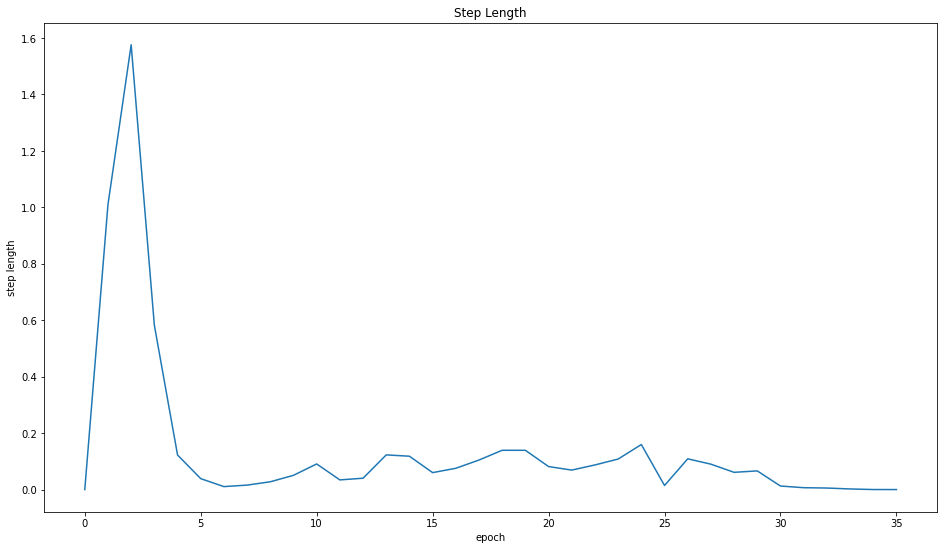

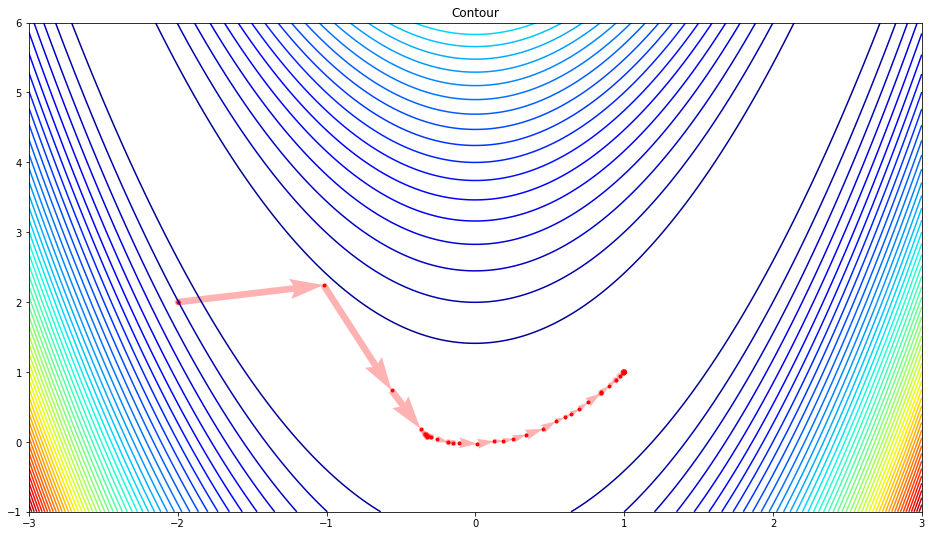

In [50]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
res = minimize(fun=rosen, x0=x0, method='BFGS', options={'return_all': True})

x_iter = res['allvecs']
iter_count = res['nit']
x_final = res['x']

x_iter.insert(0,x0)
print('Iteration Count: %d\n' % iter_count)
print(f'Converge to point: {x_final}')
draw_step_len(compute_step_len(x_iter))
visualize(x_iter)

## Conjugate Gradient

Iteration Count: 39

Converge to point: [0.99999341 0.9999868 ]


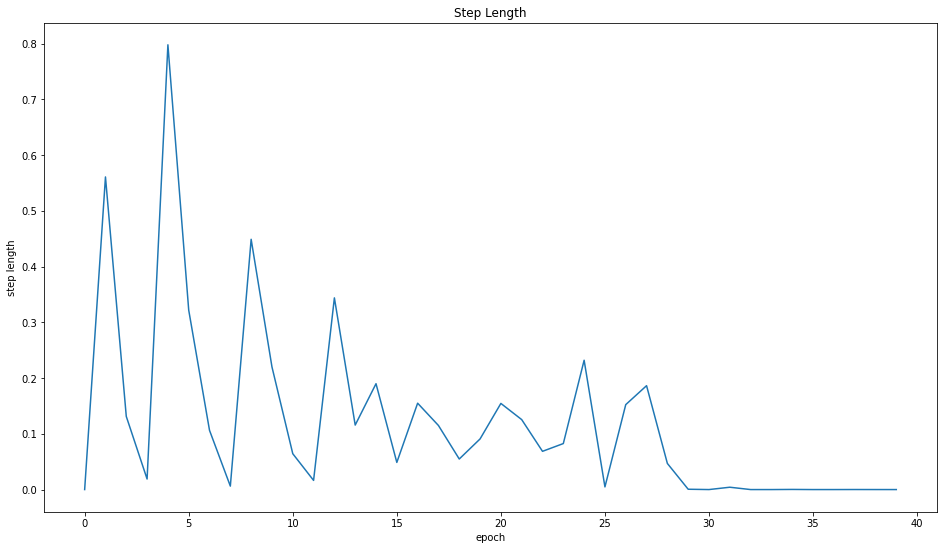

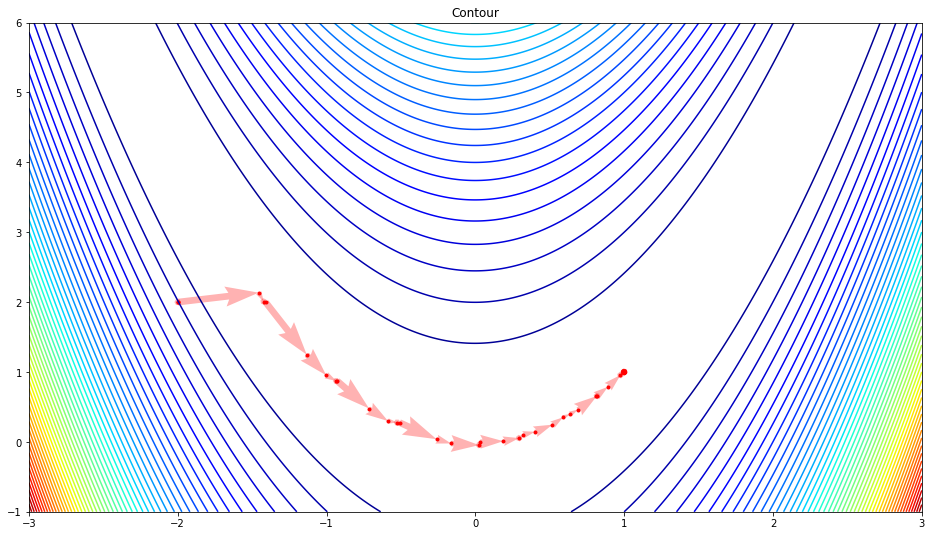

In [51]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
res = minimize(fun=rosen, x0=x0, method='CG', options={'return_all': True})

x_iter = res['allvecs']
iter_count = res['nit']
x_final = res['x']

x_iter.insert(0,x0)
print('Iteration Count: %d\n' % iter_count)
print(f'Converge to point: {x_final}')
draw_step_len(compute_step_len(x_iter))
visualize(x_iter)

## Modified Newton's method with conjugate gradient

Iteration Count: 277

Converge to point: [1.         0.99999999]


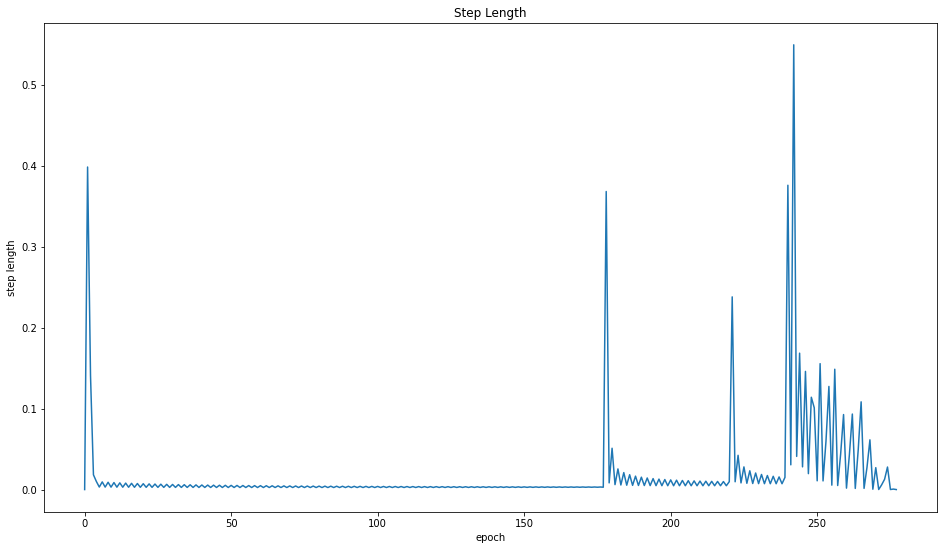

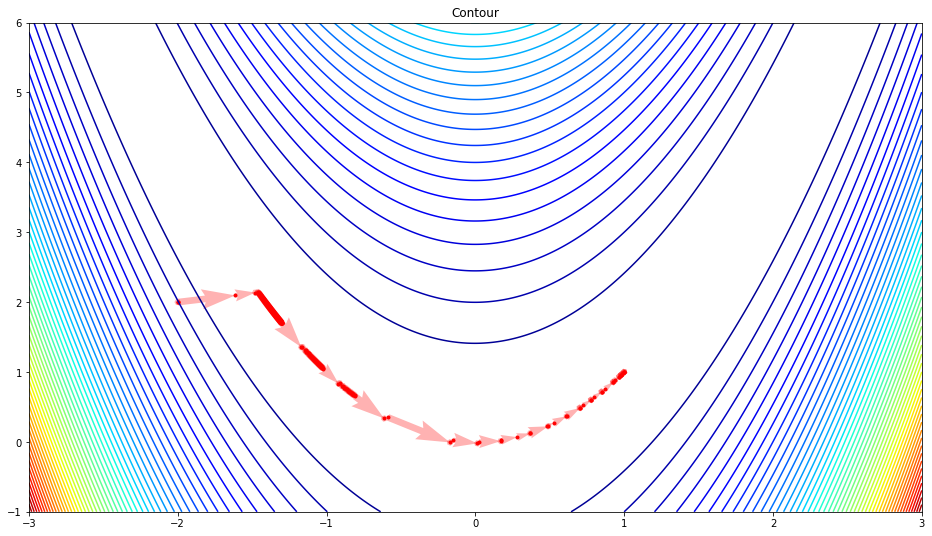

In [52]:
x0 = np.array([-2,2])
x_iter = list()
## TODO (HINT:You will need to feed in rosen_hess in this optimize function)
res = minimize(fun=rosen, x0=x0, method='Newton-CG', jac=rosen_der, options={'return_all': True})

x_iter = res['allvecs']
iter_count = res['nit']
x_final = res['x']

x_iter.insert(0,x0)
print('Iteration Count: %d\n' % iter_count)
print(f'Converge to point: {x_final}')
draw_step_len(compute_step_len(x_iter))
visualize(x_iter)

## Gradient Descent with optimal step length

In [53]:
def Gradient_Descent(Grad, x, epsilon=0.00001, nMax = 10000):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments:
        # x_iter: a list which contains new x for each step of iteration
        # step_length: a list which contains the optimal step length for each step of iteration
        # iter_count: an integer, the number of iteration the algorithm taken to convergence
        
    iter_count = 0
    x_current = x
    x_iter = []
    step_len = 0
    step_length = []
    # print(f"X INIT: {x}")

    def step_len_obj(t_, x_, dummy=0):
      return rosen(x_ - t_ * Grad(x_))
    def step_len_obj_der(x):
      return rosen(pos - x * Grad(pos)) @ rosen_der(pos)
    def step_len_constraint(t):
      return t
    def search_step_len(x, last_step_len):
      return np.clip(fmin(step_len_obj, 0, args=(x, 0), disp=0), a_min=0, a_max=1)

    while(iter_count <= nMax and (np.linalg.norm(Grad(x_current)) >= epsilon)):
      grad_current = Grad(x_current)
      hessian_current = rosen_hess(x_current)
      steep_descent_dir = -grad_current
      # step_len = - ((np.transpose(grad_current) @ steep_descent_dir)) / ((np.transpose(steep_descent_dir) @ hessian_current) @ steep_descent_dir)
      step_len = search_step_len(x_current, step_len)

      x_current = x_current + step_len * steep_descent_dir
      iter_count += 1
      # print(f"x_current: {x_current}")
      # print(f"hessian_current: {hessian_current}")
      # print(f"steep_descent_dir: {steep_descent_dir}")
      # print(f"step_len: {step_len}")
      # print(f"iter_count: {iter_count}")

      x_iter.append(x_current)
      step_length.append(step_len)

    return x_iter, iter_count, step_length

Iteration Count: 10001

Converge to point: [0.99996579 0.99993138]


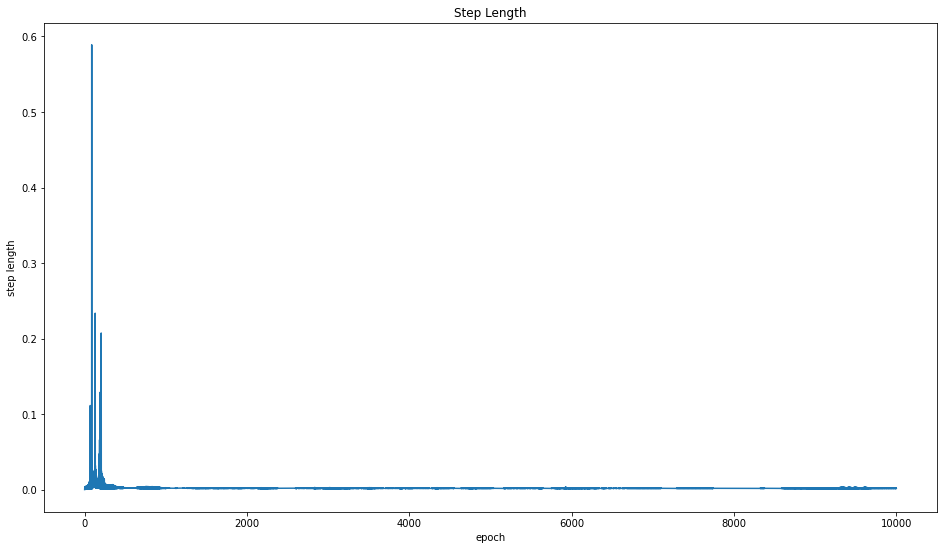

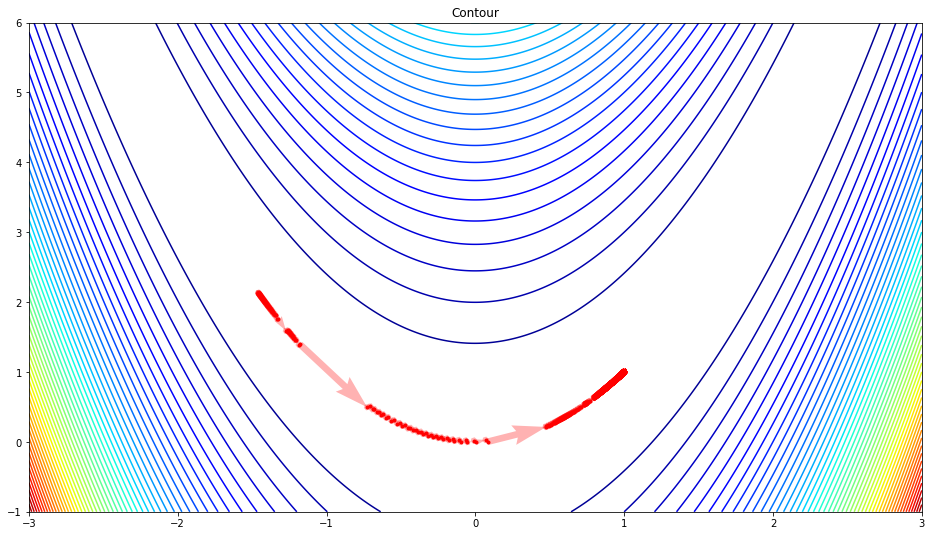

In [54]:
x0 = np.array([-2,2])
x_iter, iter_count, step_length = Gradient_Descent(rosen_der, x0)
print('Iteration Count: %d\n' % iter_count)
print(f'Converge to point: {x_iter[-1]}')
draw_step_len(step_length)
visualize(x_iter)

## Pure Newton's Method

In [55]:
def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 10000 ):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # Grad2: the second derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments: (same as above)
    # Hint: Use numpy.linalg to compute the inverse of a matrix

    iter_count = 0
    x_current = x
    x_iter = []
    step_length = []
    # print(f"X INIT: {x}")
    while(iter_count <= nMax):
      grad_current = Grad(x_current)
      hessian_current = Grad2(x_current)
      steep_descent_dir = -(np.linalg.inv(hessian_current) @ grad_current)
      step_len = np.linalg.norm(steep_descent_dir)
      x_current = x_current + step_len * steep_descent_dir
      iter_count += 1
      # print(f"x_current: {x_current}")
      # print(f"hessian_current: {hessian_current}")
      # print(f"steep_descent_dir: {steep_descent_dir}")
      # print(f"step_len: {step_len}")
      # print(f"iter_count: {iter_count}")

      x_iter.append(x_current)
      step_length.append(step_len)

    return x_iter, iter_count, step_length

Iteration Count: 10001

Converge to point: [0.99995529 0.9999097 ]


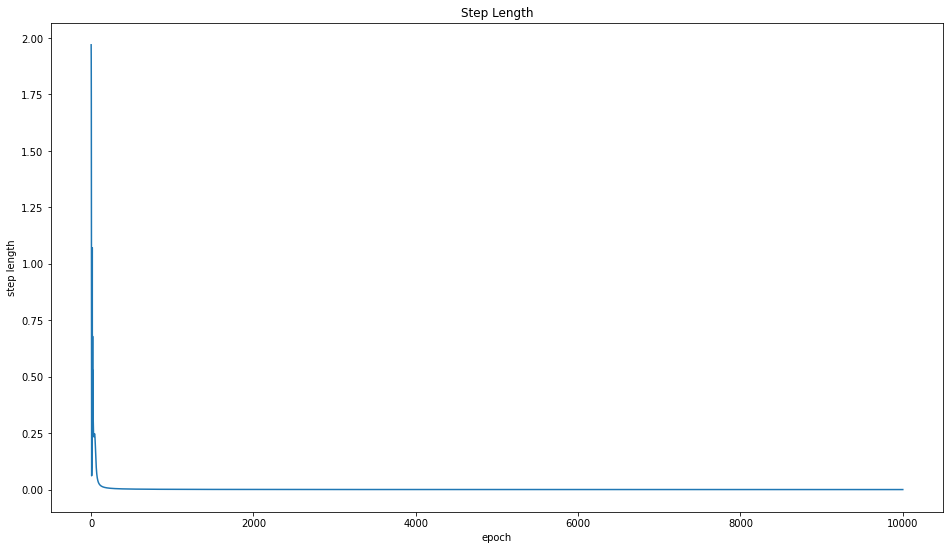

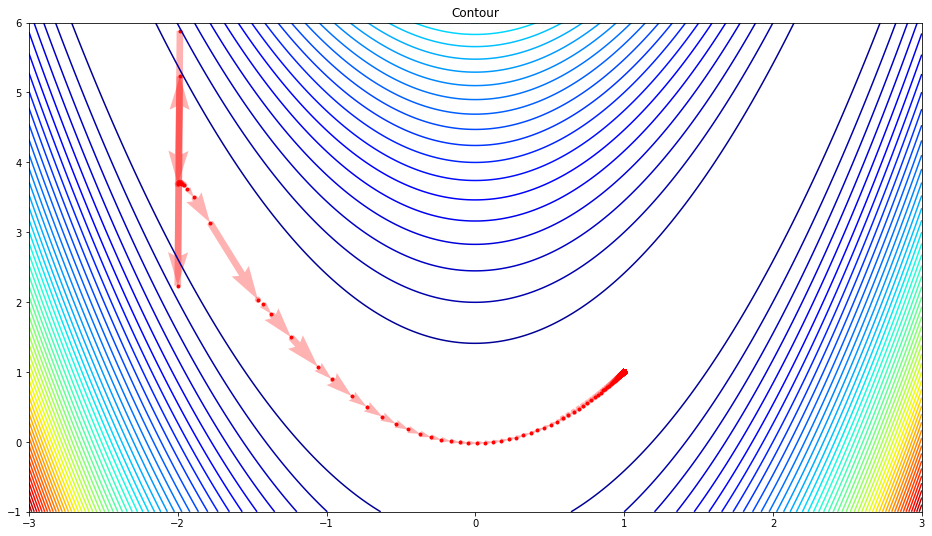

In [56]:
x0 = np.array([-2,2])
x_iter, iter_count, step_length = Newton(rosen_der,rosen_hess,x0)
print('Iteration Count: %d\n' % iter_count)
print(f'Converge to point: {x_iter[-1]}')
draw_step_len(step_length)
visualize(x_iter)

## Report


Denote the objective function as $f(x_k)$, where $x_k$ is the location at step k.

## Implementation of Steepest Descent Method

Here I implemented a more general one. The descent direction is

$$\vec{p}_{k} = \nabla_{x} f(\vec{x}_k)$$

The step length is decided by the following formua. Note is that we need to clip or use contraint optimization to limit the step size between 0 to 1.

$$\alpha_k = clip(\min \ \vec{x}_k - \alpha_k \nabla_x f(\vec{x}_k), 0, 1)$$

Then we can compute the next step as

$$\vec{x}_{k+1} = \vec{x}_k + \alpha_k \vec{p}_k$$

## Implementation of Newton's Method

The Newton's direction is

$$\vec{p}_{k} = -H_k^{-1} \nabla_x f(\vec{x}_k)$$

where $H_k$ is the Hessian matrix $H_k = \nabla_x^2 f(\vec{x}_k)$.

To record the step lenght of each iteration, I compute the L2-norm of the Newton's direction as the step lenght $\alpha_k$ of the iteration $k$.

$$\alpha_k = || \vec{p}_k ||_2$$

Finally, we can compute the next step $\vec{x}_{k+1}$ as

$$\vec{x}_{k+1} = \vec{x}_k + \alpha_k \vec{p}_k$$

## Comparison

> The steepest descent method has zig-zag pattern and the step length would increase suddenly while it changes the direction largely. 

> The Newton's method would oscillate around the initial point but the reason still remain unclear. However, the step length keep decreasing.

> The step length of modified Newton's method with conjugate gradient suddenly increases at the last few steps.

> Conjugate gradient and BFGS converge within 40 steps. The trajectory of the conjugate gradient is more smooth than BFGS. But the step lenght of BFGS converges more steady than conjugate gradient.

